# Purpose of this simulation


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tables
import aopy
import sklearn
from weights import *
from weights_linear_regression import calc_R2_with_sim_C
# so that we write in latex
from matplotlib import rc
import matplotlib.font_manager  # for ubuntu

from afs_plotting import subplots_with_labels

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
rc('text', usetex=False)

np.set_printoptions(precision=5, suppress=True)
sns.set_context('paper')

save_to_pickle = True
save_to_gdrive = False# this is done through the gdrive's mapping to the local file system
gdrive_directory = '/home/aolab/gdrive/Projects/Feature Selection/Figures/'
dpi_value = 300
error_bar_method = 'sem'  #  'sem' or percentiles


/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:8: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:8: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# ideas

In [2]:
# this is for creating exp_conditions that scan the difference across the files
#for comparision
#data_dump_folder = '/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/more_neurons/run_3/'
# data_dump_folder = \
# 'D:/sim_data/gaussian_peaks/2022_02_02_gaussian_peaks/'

ROUND_DECIMALS = 3


data_dump_folder = \
'/home/aolab/sijia/data/figure4_convex_stationary_encoder/'
n_neurons = 128
# 
mean_first_peak = 50
mean_second_peak = 100
std = 3
ENCODER_CHANGE_MODE = "same"

# clda setup 
rho = 0.5
batchlen = 100

# noises = np.arange(9)
# noises = np.exp2(noises)
noises = [32]
noise = 32

smoothness_coef = 0.1
num_of_lags = 3#  this is the K in the formulation, the number of batch updated feature scores we expect it to be.
past_batch_decay_factor = 0.2


exp_conds = []

random_seeds = np.arange(1)
sparsity_array = [0.06]
# smoothness_array = np.arange(0.0, 0.15, 0.025) # this is different from the start out from the full feature set
# smoothness_array = np.array([0, 0.05, 0.1, 0.125])
smoothness_array = np.array([0, 0.05, 0.1, 0.125])

sparsity_array = np.round(sparsity_array, ROUND_DECIMALS)
smoothness_array = np.round(smoothness_array, ROUND_DECIMALS)

num_of_features_array  = [32]   # specify how many features we want to use, or None
#TODO: add 32 to that number of features array

for random_seed in random_seeds:
    for sparsity_val in sparsity_array:
        for smoothness_val in smoothness_array:
            for num_of_features in num_of_features_array:
                exp_conds_add = [f'joint_convex_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std}_clda_rho_{rho}_batchlen_{batchlen}_sparsity_{sparsity_val}_smooth_{smoothness_val}_lags_{num_of_lags}_decay_{past_batch_decay_factor}_num_feats_{num_of_features}_{ENCODER_CHANGE_MODE}' ]
                exp_conds.extend(exp_conds_add)
            #exp_conds.extend(exp_conds_keep)

feature_selection_schemes = ['w/o feature selection', 'convex', 'subset throughout']

NUM_SPARSITY, NUM_SMOOTH = len(sparsity_array), len(smoothness_array)

print("the folder at which data is located:")
print(data_dump_folder)
print(f"we have {len(exp_conds)}" , f"num of sparsity vals {NUM_SPARSITY}", f'num of smoothness vals {NUM_SMOOTH}')


for e in exp_conds: print(e)


the folder at which data is located:
/home/aolab/sijia/data/figure4_convex_stationary_encoder/
we have 4 num of sparsity vals 1 num of smoothness vals 4
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.05_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.1_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.125_lags_3_decay_0.2_num_feats_32_same


In [3]:

from afs_files import load_feature_selection_files
(exp_data_all, exp_metadata_all) = load_feature_selection_files(data_dump_folder, exp_conds)
print(f'we collected {len(exp_data_all)} number of experiments')

/home/aolab/sijia/analyze/aopy/preproc/bmi3d.py:382: UserWarning: Warning: no sync clock connected! This will usually result in problems.
  warnings.warn("Warning: no sync clock connected! This will usually result in problems.")
/home/aolab/sijia/analyze/aopy/preproc/bmi3d.py:449: UserWarning: No sync events present, using bmi3d events instead
  warnings.warn("No sync events present, using bmi3d events instead")


we collected 4 number of experiments


# Check feature selection strategies

## check feature weights 

Text(0.5, 1.0, 'Feature distribution std 3 Hz')

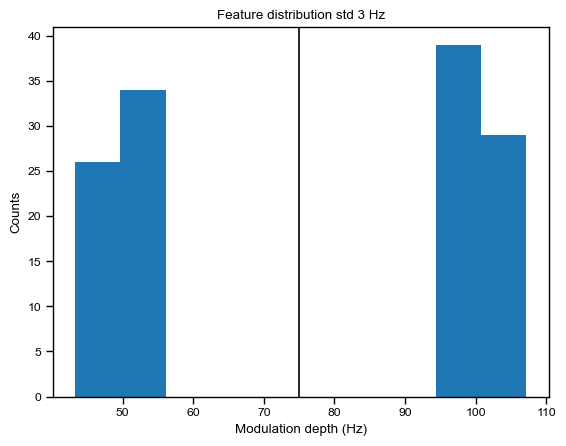

In [4]:
feature_weights = exp_data_all[1]['feature_selection']['feature_weights']
# plot the histogram of the feature weights

fig_weight, ax_weight = plt.subplots()
ax_weight.hist(feature_weights)
ax_weight.axvline(x = 75, color = 'k')
ax_weight.set_xlabel('Modulation depth (Hz)')
ax_weight.set_ylabel('Counts')
ax_weight.set_title(f'Feature distribution std {std} Hz')

## check between conditions

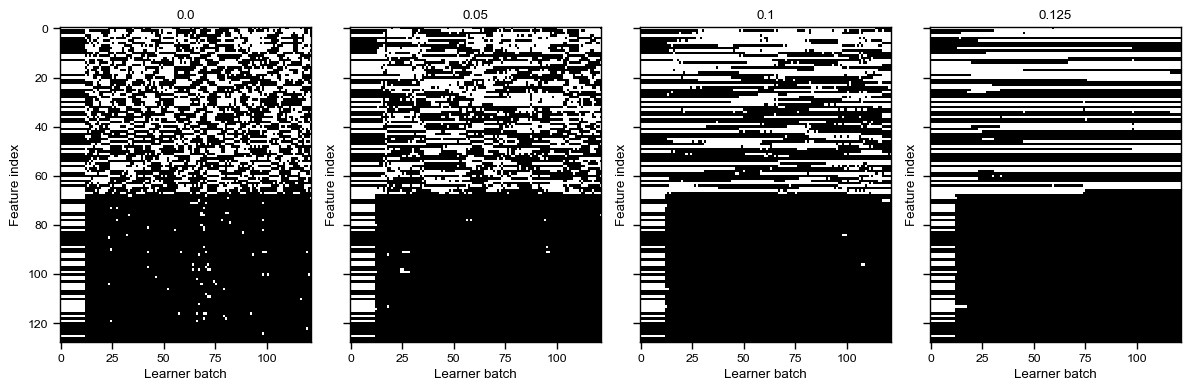

In [5]:
import importlib 
from afs_plotting import plot_feature_selection

num_columns = NUM_SMOOTH

fig_feat_activity, ax_feat_activity = plt.subplots(1, num_columns, 
                                                   sharey = True,
                                                   figsize = (12, 4))



for i, (e, a, s) in enumerate(zip(exp_data_all,  ax_feat_activity, smoothness_array)):
    plot_feature_selection(e['feature_selection']['feat_set'], ax = a)
    
    #only title the exp if there are three exp, right. 
    a.set_title(np.round(s, decimals = ROUND_DECIMALS))

fig_feat_activity.tight_layout()


In [6]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []

selected_feature_batches = [exp_data_all[i]['feature_selection']['feat_set'] for i in range(len(exp_data_all))]

for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())

num_features_exp_by_batch = np.array(num_features_exp_by_batch)
selected_feature_batches = np.array(selected_feature_batches)


In [7]:
num_batches = [s.shape[0] for s in selected_feature_batches]


num_batches = np.array(num_batches)
num_batches = num_batches.reshape((len(random_seeds), -1))

num_batches.shape

num_batches

array([[122, 122, 122, 122]])

In [8]:
print(selected_feature_batches.shape)

selected_features_conds_by_feature_batches = np.moveaxis(selected_feature_batches, 1, 2)


smoothness_conds_by_batch = \
calculate_feature_smoothness_multiple_conditions(selected_features_conds_by_feature_batches,
                                                 mode = "incremental")


if len(smoothness_array) <= len(exp_conds):
    # then we need to do reshape and median
    # assume that len(random_seeds) x len(smooth) = total number of exp
    smoothness_conds_by_batch_reshape = np.reshape(smoothness_conds_by_batch,
                                             (len(random_seeds), len(smoothness_array), -1))
    
    # # after reshape,  we median along the random and first axiss
    smoothness_conds_by_batch_median = np.median(smoothness_conds_by_batch_reshape, 
                                        axis = 0)
    
    # then depending on the error_bar_method, we calculate the error bars
    if error_bar_method == 'sem':
        smoothness_conds_by_batch_sem = 1.25 * np.std(smoothness_conds_by_batch_reshape, axis = 0) / np.sqrt(len(random_seeds))

        smoothness_conds_by_batch_25 = smoothness_conds_by_batch_median - smoothness_conds_by_batch_sem
        smoothness_conds_by_batch_75 = smoothness_conds_by_batch_median + smoothness_conds_by_batch_sem
        print("used the sem to calulate the error bar in smoothness")

    elif error_bar_method == 'percentiles':
        smoothness_conds_by_batch_error = np.percentile(smoothness_conds_by_batch_reshape, [25, 75], axis = 0)
    else:
        raise ValueError('error bar method not recognized')


    # print out a message
    print("we reshaped the smoothness array")

    # # averaging across the random seeds axis, the first axis
    smoothness_conds_by_batch = np.median(smoothness_conds_by_batch_reshape, axis = 0)

print(smoothness_conds_by_batch.shape)
print(smoothness_conds_by_batch_median.shape)
print(smoothness_conds_by_batch_25.shape)
print(smoothness_conds_by_batch_75.shape)


(4, 122, 128)
used the sem to calulate the error bar in smoothness
we reshaped the smoothness array
(4, 121)
(4, 121)
(4, 121)
(4, 121)


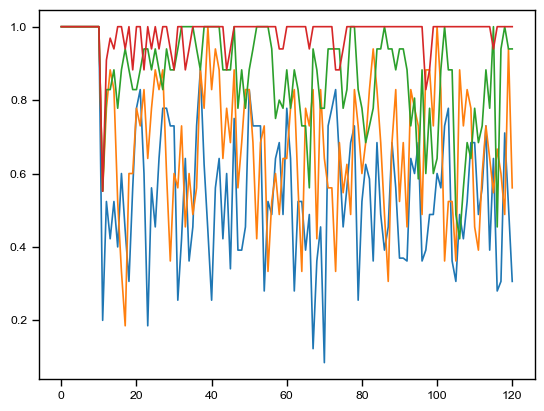

In [9]:
# make a figure that plots the smoothness

fig_smoothness, ax_smoothness = plt.subplots()
ax_smoothness.plot( smoothness_conds_by_batch.T)

In [10]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []

for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())


num_features_exp_by_batch = np.array(num_features_exp_by_batch)
selected_feature_batches = np.array(selected_feature_batches)

## calculate Decoder-Encoder error

In [50]:
from convergence_analysis import calc_cosine_to_target_matrix


active_angles_all = []
active_angles_25_all = []
active_angles_75_all = []

top_weights = 64
active_angles_all_top = []
active_angles_25_all_top = []
active_angles_75_all_top = []

bottom_weights = 32
active_angles_all_bottom = []
active_angles_25_all_bottom = []
active_angles_75_all_bottom = []

for i in range(len(exp_data_all)):

    feature_selection_data = exp_data_all[i]['feature_selection']
    enc_directions = feature_selection_data["sim_C"]
    dec_directions = feature_selection_data['C_mat']
        
    angles_hist = calc_cosine_to_target_matrix(dec_directions, enc_directions, deg = True)

    active_angles = np.nanmedian(angles_hist, axis = 1)
    active_angles_25, active_angles_75 = np.nanpercentile(angles_hist,[25, 75] ,axis = 1)

    # we look at how errors change for the top weights
    active_angles_top = np.nanmedian(angles_hist[:, :top_weights], axis = 1)
    active_angles_25_top, active_angles_75_top = \
        np.nanpercentile(angles_hist[:, :top_weights],[25, 75],
                            axis = 1)
    
    # we look at how errors change for the bottom weights
    active_angles_bottom = np.nanmedian(angles_hist[:, -bottom_weights:], axis = 1)
    active_angles_25_bottom, active_angles_75_bottom = \
        np.nanpercentile(angles_hist[:, -bottom_weights:],[25, 75],
                            axis = 1)
    
    # save the results
    active_angles_all.append(active_angles)
    active_angles_25_all.append(active_angles_25)
    active_angles_75_all.append(active_angles_75)

    active_angles_all_top.append(active_angles_top)
    active_angles_25_all_top.append(active_angles_25_top)
    active_angles_75_all_top.append(active_angles_75_top)

    active_angles_all_bottom.append(active_angles_bottom)
    active_angles_25_all_bottom.append(active_angles_25_bottom)
    active_angles_75_all_bottom.append(active_angles_75_bottom)

active_angles_all = np.array(active_angles_all)
active_angles_25_all = np.array(active_angles_25_all)
active_angles_75_all = np.array(active_angles_75_all)

active_angles_all_top = np.array(active_angles_all_top)
active_angles_25_all_top = np.array(active_angles_25_all_top)
active_angles_75_all_top = np.array(active_angles_75_all_top)

active_angles_all_bottom = np.array(active_angles_all_bottom)
active_angles_25_all_bottom = np.array(active_angles_25_all_bottom)
active_angles_75_all_bottom = np.array(active_angles_75_all_bottom)

/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


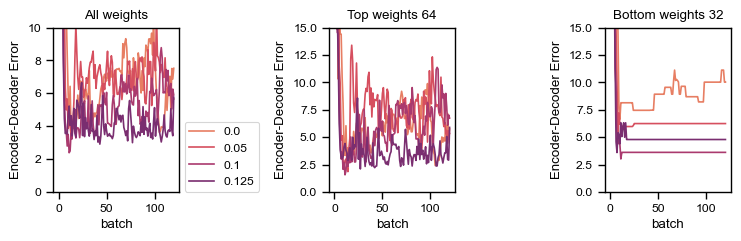

In [51]:
fig, axes = plt.subplots(1, 3, figsize = (7.5, 2.5))

colors = sns.color_palette('flare', n_colors=len(smoothness_array))

if len(exp_data_all) <= len(smoothness_array):

    ax = axes[0]
    ax.set_title('All weights')

    for m, l_25, u_25, lab, c in zip(active_angles_all, 
                                active_angles_25_all, 
                                active_angles_75_all, 
                                smoothness_array,
                                colors):
        ax.plot(m, label = lab, color = c)
        # ax.fill_between(np.arange(len(m)), l_25, u_25, 
        #                 color = c, alpha = 0.3)
    ax.set_xlabel('batch')
    ax.set_ylabel("Encoder-Decoder Error")
    ax.set_ylim([0, 10])
    ax.legend(loc = (1.04, 0))

    # next axis for the top weights
    ax = axes[1]
    ax.set_title(f'Top weights {top_weights}')

    for m, l_25, u_25, lab, c in zip(active_angles_all_top,
                                        active_angles_25_all_top,
                                        active_angles_75_all_top,
                                        smoothness_array,
                                        colors):
            ax.plot(m, label = lab, color = c)
            # ax.fill_between(np.arange(len(m)), l_25, u_25, 
            #                 color = c, alpha = 0.3)
    ax.set_xlabel('batch')
    ax.set_ylabel("Encoder-Decoder Error")
    ax.set_ylim([0, 15])

    # next axis for the bottom weights
    ax = axes[2]
    ax.set_title(f'Bottom weights {bottom_weights}')

    for m, l_25, u_25, lab, c in zip(active_angles_all_bottom,
                                        active_angles_25_all_bottom,
                                        active_angles_75_all_bottom,
                                        smoothness_array,
                                        colors):
            ax.plot(m, label = lab, color = c)
            # ax.fill_between(np.arange(len(m)), l_25, u_25, 
            #                 color = c, alpha = 0.3)
    ax.set_xlabel('batch')
    ax.set_ylabel("Encoder-Decoder Error")
    ax.set_ylim([0, 15])
    

    
fig.tight_layout()

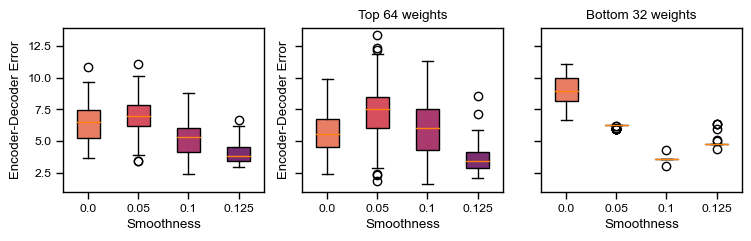

In [59]:
fig, axes =  plt.subplots(1, 3, 
                          figsize = (7.5, 2.5),
                          sharey = True)
skipped = 10 # skip the first 10 batches

# mark each box with a different color
ax = axes[0]
colors = sns.color_palette('flare', n_colors=len(smoothness_array))


box = ax.boxplot(active_angles_all[:, skipped:].T, 
                 patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(smoothness_array)
ax.set_xlabel('Smoothness')
ax.set_ylabel('Encoder-Decoder Error')

ax = axes[1]
box = ax.boxplot(active_angles_all_top[:, skipped:].T, 
                 patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(smoothness_array)
ax.set_xlabel('Smoothness')
ax.set_ylabel('Encoder-Decoder Error')
ax.set_title(f'Top {top_weights} weights')

# then for the bottom weights
ax = axes[2]
ax.set_title(f'Bottom {bottom_weights} weights')
box = ax.boxplot(
                 active_angles_all_bottom[:, skipped:].T, 
                 patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(smoothness_array)
ax.set_xlabel('Smoothness')


fig.tight_layout()



In [62]:
### save the box plot data to pickle
if save_to_pickle:
    import pickle

    box_plot_data = {'active_angles_all': active_angles_all,
                     'active_angles_all_top': active_angles_all_top,
                     'active_angles_all_bottom': active_angles_all_bottom,
                     'smoothness_array': smoothness_array,
                     'exp_conds': exp_conds,
                     "n_skipped": skipped}

    with open(data_dump_folder + 'encoder_decoder_box_plot_data.pkl',
               'wb') as f:
        pickle.dump(box_plot_data, f)

    print('saved box plot data to pickle')

saved box plot data to pickle


In [61]:
data_dump_folder

'/home/aolab/sijia/data/figure4_convex_stationary_encoder/'


# Behaviour comparision

## count how many rewards

In [11]:
fps = 60

reward_rate_all = list()
window_time_stamps_all = list()
NUM_EXP = len(exp_data_all)

total_rewards_all = list()

for i in range(NUM_EXP):

    time_stamps = exp_data_all[i]['events']['time'] / fps
    events = exp_data_all[i]['events']['event']
    
    num_rewards = np.count_nonzero(events == b'REWARD')

    (reward_rate, window_time_stamps) = aopy.analysis.calc_running_event_rate(b'REWARD', events, time_stamps, 
                                                                window_size= 120,
                                                                 window_step= 30)
    reward_rate_all.append(reward_rate)
    window_time_stamps_all.append(window_time_stamps)
    total_rewards_all.append(num_rewards)


window_stamps_all = np.array(window_time_stamps_all)
reward_rate_all = np.array(reward_rate_all) 
reward_rate_all = reward_rate_all.reshape((NUM_EXP,-1))
window_stamps_all = window_stamps_all.reshape((NUM_EXP,-1))

total_rewards_all = np.array(total_rewards_all)

# if the num of experiemnt is larger than the len of smoothness array, then we need to reshape and median
if len(smoothness_array) <= len(exp_conds):

    print("before reshape", reward_rate_all.shape  )
    # then we need to do reshape and median
    # assume that len(random_seeds) x len(smooth) = total number of exp
    reward_rate_all = np.reshape(reward_rate_all,
                                             (len(random_seeds), len(smoothness_array), -1))
    
    # # after reshape,  we median along the random and first axiss
    reward_rate_all_median = np.median(reward_rate_all, axis = 0)

    # print out a message
    # calculate the median across the random seeds, and the 25th, 75th percentiles
    # calculate the error bars based on the error_bar_method
    if error_bar_method == "sem":
        reward_rate_all_sem = np.std(reward_rate_all, axis = 0) / np.sqrt(len(random_seeds))
        reward_rate_all_25 = reward_rate_all_median - reward_rate_all_sem
        reward_rate_all_75 = reward_rate_all_median + reward_rate_all_sem
        print("used the sem method")
    elif error_bar_method == "percentiles":
        reward_rate_all_25, reward_rate_all_75 = np.percentile(reward_rate_all, [25, 75], axis = 0)
        print("used the percentiles method")

    reward_rate_all = np.median(reward_rate_all, axis = 0)


print(reward_rate_all.shape)
print(reward_rate_all.shape)
print(reward_rate_all_25.shape, reward_rate_all_75.shape)

before reshape (40, 36)
used the sem method
(4, 36)
(4, 36)
(4, 36) (4, 36)


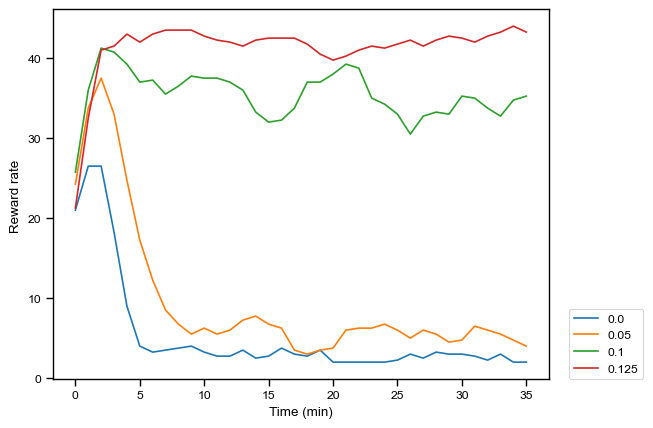

In [12]:

plt.plot(reward_rate_all.T)
plt.xlabel('Time (min)')
plt.ylabel('Reward rate ')
plt.legend(np.round(smoothness_array,ROUND_DECIMALS), loc=(1.04,0))


# Summary Figure for Figure 4

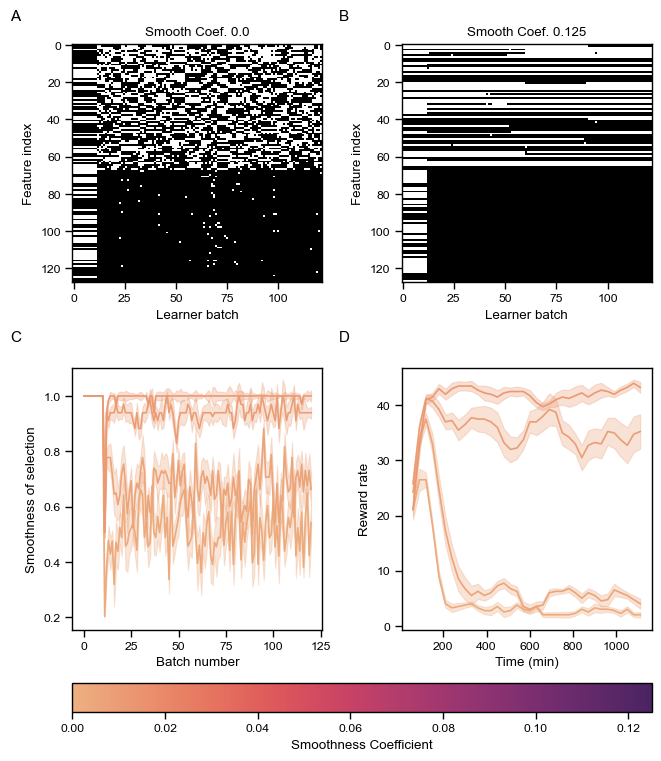

In [13]:
# we make a 4 by 4 figure

figure4, summary_axes = subplots_with_labels(2,2, figsize = (6.5, 7.5), gridspec_kw={'height_ratios': [1, 1.1]})

active_set_to_plot_indices = [0, -1]

for i, a in enumerate(active_set_to_plot_indices):
    # the top 2 are the feature selection plots
    plot_feature_selection(exp_data_all[a]['feature_selection']['feat_set'], 
                        ax = summary_axes[0,i])

    summary_axes[0,i].set_title(f'Smooth Coef. {smoothness_array[a]}')

# plot the smoothness of the features
colors = sns.color_palette('flare', n_colors=len(exp_data_all))
norm = plt.Normalize(smoothness_array.min(), smoothness_array.max())
sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)

# plot of the smoothness of the features using 25th and 75th percentiles
for i in range(len(smoothness_array)):
    summary_axes[1,0].plot(smoothness_conds_by_batch_median[i], color = colors[i])
    summary_axes[1,0].fill_between(np.arange(len(smoothness_conds_by_batch_median[i])),
                                   smoothness_conds_by_batch_25[i],
                                   smoothness_conds_by_batch_75[i],
                                   color = colors[i], alpha = 0.3)


summary_axes[1,0].set_xlabel('Batch number')
summary_axes[1,0].set_ylabel('Smoothness of selection')


# plot the reward rate and the 25 the percentile and 75th percentiles
for i in range(len(smoothness_array)):
    summary_axes[1,1].plot(window_stamps_all[0], reward_rate_all[i], color = colors[i])
    summary_axes[1,1].fill_between(window_stamps_all[0], 
                                   reward_rate_all_25[i], 
                                   reward_rate_all_75[i],
                                     color = colors[i], alpha = 0.3)


summary_axes[1,1].set_ylabel('Reward rate')
summary_axes[1,1].set_xlabel('Time (min)')
cbar = figure4.colorbar(sm, ax=summary_axes[1,:],
                 orientation='horizontal',
                 location = "bottom")
cbar.set_label('Smoothness Coefficient')
# figure4.tight_layout()

### save results to pickle files


In [14]:
import pickle
# save the smoothness array and reward rate array into a pickle file
if save_to_pickle:
    smooth_and_reward_dict = dict()
    smooth_and_reward_dict['smoothness_array'] = smoothness_array
    smooth_and_reward_dict['smoothness_conds_by_batch'] = smoothness_conds_by_batch
    # also save the 25th and 75th percentile
    smooth_and_reward_dict['smoothness_conds_by_batch_25'] = smoothness_conds_by_batch_25
    smooth_and_reward_dict['smoothness_conds_by_batch_75'] = smoothness_conds_by_batch_75
    smooth_and_reward_dict['reward_rate_all'] = reward_rate_all
    smooth_and_reward_dict['reward_rate_all_25'] = reward_rate_all_25
    smooth_and_reward_dict['reward_rate_all_75'] = reward_rate_all_75
    with open(data_dump_folder + 'smooth_and_reward_dict_stationary.pkl', 'wb') as f:
        pickle.dump(smooth_and_reward_dict, f)

In [15]:
data_dump_folder

'/home/aolab/sijia/data/figure4_convex_stationary_encoder/'

### save to gdrive

In [16]:
if save_to_gdrive:
    figure4.savefig(gdrive_directory + 'figure4a_smoothness_scan.pdf', dpi = dpi_value)
    figure4.savefig(gdrive_directory + 'figure4a_smoothness_scan.png', dpi = dpi_value)

# Look at the interaction effects of the algorithm

In [2]:
# this is for creating exp_conditions that scan the difference across the files
#for comparision
#data_dump_folder = '/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/more_neurons/run_3/'
# data_dump_folder = \
# 'D:/sim_data/gaussian_peaks/2022_02_02_gaussian_peaks/'

ROUND_DECIMALS = 3


data_dump_folder = \
'/home/aolab/sijia/data/figure4_convex_stationary_encoder/'
n_neurons = 128
# 
mean_first_peak = 50
mean_second_peak = 100
std = 3
ENCODER_CHANGE_MODE = "same"

# clda setup 
rho = 0.5
batchlen = 100

# noises = np.arange(9)
# noises = np.exp2(noises)
noises = [32]
noise = 32

smoothness_coef = 0.1
num_of_lags = 3#  this is the K in the formulation, the number of batch updated feature scores we expect it to be.
past_batch_decay_factor = 0.2


exp_conds = []
random_seeds = np.arange(3)

sparsity_array = [0.06]
# smoothness_array = np.arange(0.0, 0.15, 0.025) # this is different from the start out from the full feature set
# we change this to a smaller range to make the display nicer

# smoothness_array = np.array([0, 0.05, 0.075, 0.1, 0.125])
# num_of_features_array  = list(range(8, n_neurons + 8, 8))

# for testing code, using smaller number of values
smoothness_array = np.array([0, 0.05, 0.1, 0.125]) # only for testing the code
num_of_features_array = list(range(8, n_neurons + 8, 8))


sparsity_array = np.round(sparsity_array, ROUND_DECIMALS)
smoothness_array = np.round(smoothness_array, ROUND_DECIMALS)
for random_seed in random_seeds:
    for sparsity_val in sparsity_array:
        for smoothness_val in smoothness_array:
            for num_of_features in num_of_features_array:
                exp_conds_add = [f'joint_convex_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std}_clda_rho_{rho}_batchlen_{batchlen}_sparsity_{sparsity_val}_smooth_{smoothness_val}_lags_{num_of_lags}_decay_{past_batch_decay_factor}_num_feats_{num_of_features}_{ENCODER_CHANGE_MODE}' ]
                exp_conds.extend(exp_conds_add)
                #exp_conds.extend(exp_conds_keep)


NUM_RANDOM_SEEDS, NUM_FEATURES, NUM_SMOOTH = \
len(random_seeds), len(num_of_features_array), len(smoothness_array)

print("the folder at which data is located:")
print(data_dump_folder)
print("num of features", len(num_of_features_array))
print("num smoothness", len(smoothness_array))
print(f"we collected {len(exp_conds)}")


for e in exp_conds: print(e)

the folder at which data is located:
/home/aolab/sijia/data/figure4_convex_stationary_encoder/
num of features 16
num smoothness 4
we collected 192
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_8_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_16_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_24_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_40_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_48_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num

In [3]:

from afs_files import load_feature_selection_files, load_and_convert_clda_pickle_files
(exp_data_all, exp_metadata_all) = load_feature_selection_files(data_dump_folder, exp_conds)
clda_data_all = load_and_convert_clda_pickle_files(data_dump_folder, exp_conds)
print(f'we collected {len(exp_data_all)} number of experiments')

/home/aolab/sijia/analyze/aopy/preproc/bmi3d.py:382: UserWarning: Warning: no sync clock connected! This will usually result in problems.
  warnings.warn("Warning: no sync clock connected! This will usually result in problems.")
/home/aolab/sijia/analyze/aopy/preproc/bmi3d.py:449: UserWarning: No sync events present, using bmi3d events instead
  warnings.warn("No sync events present, using bmi3d events instead")


we collected 192 number of experiments


In [4]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []

for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())


num_features_exp_by_batch = np.array(num_features_exp_by_batch)

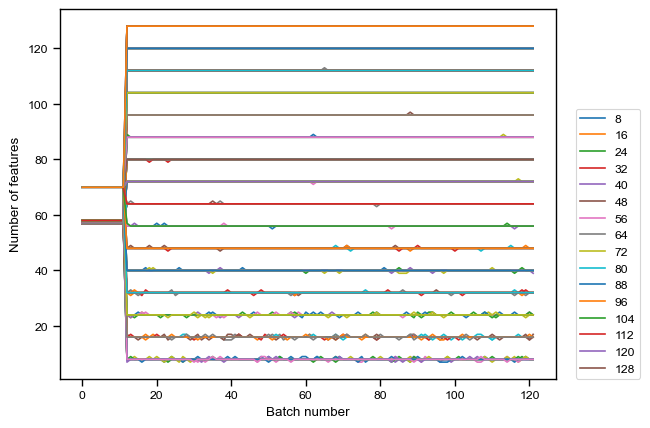

In [5]:
fig_num_features, ax_num_features = plt.subplots()

ax_num_features.plot(num_features_exp_by_batch.T)

ax_num_features.set_xlabel('Batch number')
ax_num_features.set_ylabel('Number of features')
ax_num_features.legend(num_of_features_array, loc=(1.04,0))

In [6]:
# get the final number of features
num_features_final = num_features_exp_by_batch[:, -1]
num_features_sparsity_smoothness = num_features_final.reshape(len(random_seeds),NUM_SMOOTH, NUM_FEATURES)

Text(0.5, 1.0, 'Number of features selected')

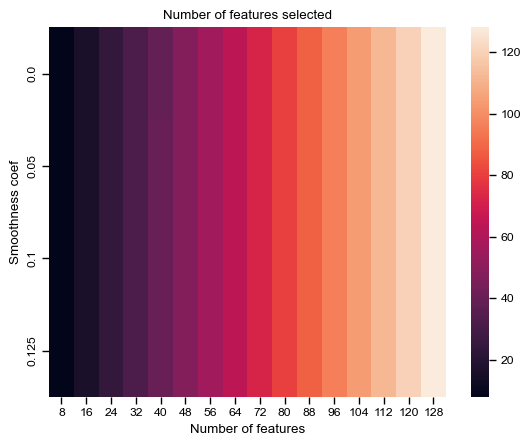

In [7]:
if len(random_seeds) > 1: 
    ax = sns.heatmap(num_features_sparsity_smoothness[0, :, :], 
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array)
else:

    ax = sns.heatmap(num_features_sparsity_smoothness, 
                xticklabels=num_of_features_array, 
                yticklabels= smoothness_array)


ax.set_ylabel('Smoothness coef')
ax.set_xlabel('Number of features')
ax.set_title('Number of features selected')


/tmp/ipykernel_1112089/2995801035.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sparsity_array)


Text(0, 0.5, 'Number of features')

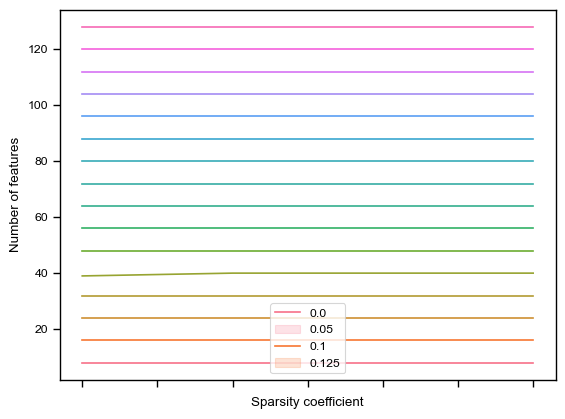

In [8]:
sns.set_palette("Blues")
if len(random_seeds) > 1:
    ax  = sns.lineplot(data = num_features_sparsity_smoothness[0, :, :], dashes=False)
else:

    ax  = sns.lineplot(data = num_features_sparsity_smoothness, dashes=False)
ax.set_xticklabels(sparsity_array)
ax.legend(smoothness_array)

ax.set_xlabel('Sparsity coefficient')
ax.set_ylabel('Number of features')

## Calculate the smoothness

In [9]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []

selected_feature_batches = [exp_data_all[i]['feature_selection']['feat_set'] for i in range(len(exp_data_all))]

for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())

num_features_exp_by_batch = np.array(num_features_exp_by_batch)
selected_feature_batches = np.array(selected_feature_batches)

In [10]:
def calculate_smoothness_error_bars(smoothness_conds_by_batch, random_seeds, smoothness_array, num_of_features_array, error_bar_method):
    """
    Calculates the median smoothness conditions and error bars based on the provided error bar method.
    
    Parameters:
    - smoothness_conds_by_batch: numpy array containing the smoothness conditions.
    - random_seeds: list of random seeds used in the experiments.
    - smoothness_array: array of smoothness conditions.
    - num_of_features_array: array of number of features for each condition.
    - error_bar_method: method to calculate error bars ('sem' or 'percentiles').
    
    Returns:
    - The median smoothness conditions, 25th percentile, and 75th percentile error bars.
    """
    # Reshape the smoothness conditions array
    smoothness_conds_by_batch_reshape = smoothness_conds_by_batch.reshape(len(random_seeds), 
                                                                           len(smoothness_array),
                                                                           len(num_of_features_array), -1)
    # Calculate median along the random and first axis
    smoothness_conds_by_batch_median = np.median(smoothness_conds_by_batch_reshape, axis=0)
    
    if error_bar_method == 'sem':
        smoothness_conds_by_batch_sem = 1.25 * np.std(smoothness_conds_by_batch_reshape, axis=0) / np.sqrt(len(random_seeds))
        smoothness_conds_by_batch_25 = smoothness_conds_by_batch_median - smoothness_conds_by_batch_sem
        smoothness_conds_by_batch_75 = smoothness_conds_by_batch_median + smoothness_conds_by_batch_sem
        print("Used the SEM to calculate the error bar in smoothness.")
    elif error_bar_method == 'percentiles':
        smoothness_conds_by_batch_error = np.percentile(smoothness_conds_by_batch_reshape, [25, 75], axis=0)
        smoothness_conds_by_batch_25 = smoothness_conds_by_batch_error[0]
        smoothness_conds_by_batch_75 = smoothness_conds_by_batch_error[1]
    else:
        raise ValueError('Error bar method not recognized')
    
    return smoothness_conds_by_batch_median, smoothness_conds_by_batch_25, smoothness_conds_by_batch_75

In [25]:
last_num_batches = 6

selected_features_conds_by_feature_batches = np.moveaxis(selected_feature_batches, 1, 2)

# assume that we know that the first 64 feature are good ones
# and the rest are bad ones
num_good_features = 64
selected_features_conds_by_feature_batches_good = \
selected_features_conds_by_feature_batches[:, :num_good_features, :]

selected_features_conds_by_feature_batches_bad = \
selected_features_conds_by_feature_batches[:, num_good_features:, :]


print(selected_features_conds_by_feature_batches.shape)
smoothness_conds_by_batch = \
calculate_feature_smoothness_multiple_conditions(selected_features_conds_by_feature_batches, 
                                                 mode = "incremental")

smoothness_conds_by_batch_good = \
calculate_feature_smoothness_multiple_conditions(selected_features_conds_by_feature_batches_good,
                                                 mode = "incremental")

smoothness_conds_by_batch_bad = \
calculate_feature_smoothness_multiple_conditions(selected_features_conds_by_feature_batches_bad,
                                                 mode = "incremental")




# calculate the median and 25th and 75th percentile around the medians

smoothness_conds_by_batch_reshape = smoothness_conds_by_batch.reshape(len(random_seeds), 
                                                                    len(smoothness_array),
                                                                    len(num_of_features_array), -1)
print("only look at the average of the last 6 batches")

smoothness_conds_by_batch_reshape = np.mean(smoothness_conds_by_batch_reshape[:, :, :, -last_num_batches:],
                                            axis = -1)

print(smoothness_conds_by_batch_reshape.shape)
if len(random_seeds) > 1:
    # then we need to do reshape and median
    # assume that len(random_seeds) x len(smooth) = total number of exp

    
    
        # # after reshape,  we median along the random and first axiss
    smoothness_conds_by_batch_median = np.median(smoothness_conds_by_batch_reshape, 
                                        axis = 0)
    
        # then depending on the error_bar_method, we calculate the error bars
    if error_bar_method == 'sem':
        smoothness_conds_by_batch_sem = 1.25 * np.std(smoothness_conds_by_batch_reshape, axis = 0) / np.sqrt(len(random_seeds))

        smoothness_conds_by_batch_25 = smoothness_conds_by_batch_median - smoothness_conds_by_batch_sem
        smoothness_conds_by_batch_75 = smoothness_conds_by_batch_median + smoothness_conds_by_batch_sem
        print("used the sem to calulate the error bar in smoothness")

    elif error_bar_method == 'percentiles':
        smoothness_conds_by_batch_error = np.percentile(smoothness_conds_by_batch_reshape, [25, 75], axis = 0)
    else:
        raise ValueError('error bar method not recognized')


    
    # # averaging across the random seeds axis, the first axis
    smoothness_conds_by_batch = np.median(smoothness_conds_by_batch_reshape, axis = 0)
else:
    smoothness_conds_by_batch = np.squeeze(smoothness_conds_by_batch_reshape)


smoothness_last_reshape = smoothness_conds_by_batch_median
print(smoothness_conds_by_batch_reshape.shape)

print(smoothness_conds_by_batch_median.shape)
print(smoothness_conds_by_batch_25.shape)
print(smoothness_conds_by_batch_75.shape)

(192, 128, 122)
only look at the average of the last 6 batches
(3, 4, 16)
used the sem to calulate the error bar in smoothness
(3, 4, 16)
(4, 16)
(4, 16)
(4, 16)


In [22]:
# smoothness_conds_by_batch_median_good, smoothness_conds_by_batch_25_good, smoothness_conds_by_batch_75_good = \
# calculate_smoothness_error_bars(smoothness_conds_by_batch_good, random_seeds, smoothness_array, num_of_features_array, error_bar_method)

# smoothness_conds_by_batch_median_bad, smoothness_conds_by_batch_25_bad, smoothness_conds_by_batch_75_bad = \
# calculate_smoothness_error_bars(smoothness_conds_by_batch_bad, random_seeds, smoothness_array, num_of_features_array, error_bar_method)


Used the SEM to calculate the error bar in smoothness.
Used the SEM to calculate the error bar in smoothness.


Text(0.5, 25.71666666666666, 'Number of features')

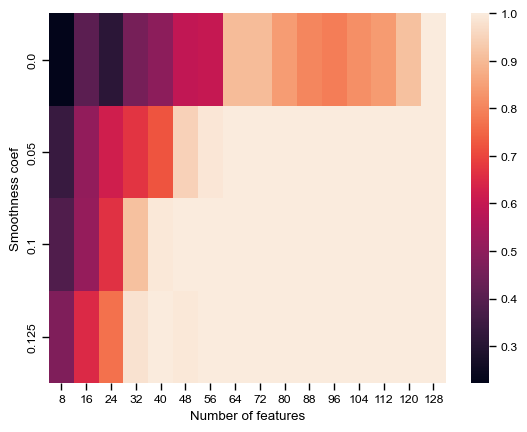

In [26]:
ax = sns.heatmap(smoothness_last_reshape,
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array)
ax.set_ylabel('Smoothness coef')
ax.set_xlabel('Number of features')

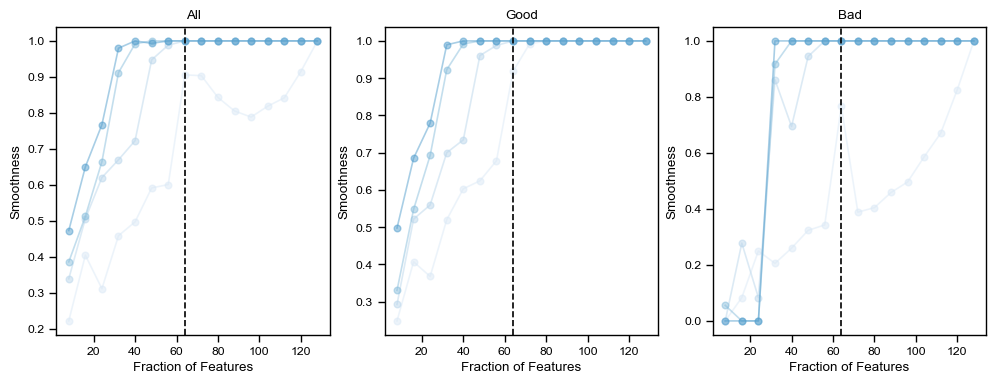

In [27]:
# # make a one row and 3 column figures
# fig_smoothness, ax_smoothness = plt.subplots(1, 3, figsize = (12, 4))
# # we plot the smoothness_last_reshape,  smoothess_last_good_reshape, smoothness_last_bad_reshape
# for ax, data, label in zip(ax_smoothness, 
#                     [smoothness_last_reshape, 
#                      smoothess_last_good_reshape, 
#                      smoothness_last_bad_reshape], 
#                      ["All", "Good", "Bad"]):
#     for d in data:
#         ax.plot(num_of_features_array, d, "-o", alpha = 0.5)
#     # plot a dotted midline at half of the smoothness value
#     ax.axvline(x  = 64, color = 'k', linestyle = '--')
#     ax.set_ylabel('Smoothness')
#     ax.set_xlabel('Fraction of Features')
#     ax.set_title(label)

Text(0.5, 1.0, 'Smoothness of feature selection')

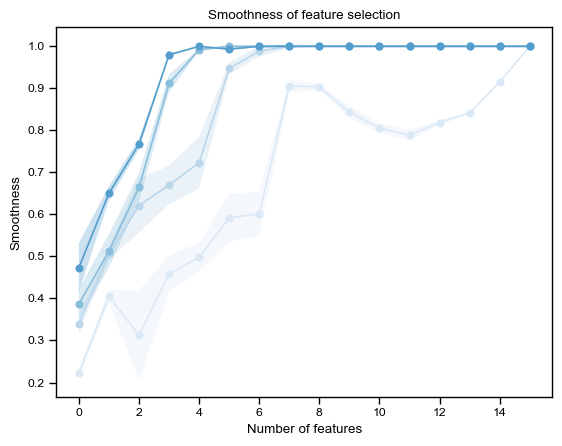

In [45]:
# make a figure just for the smoothenss
fig_smoothness, ax_smoothness = plt.subplots()
ax_smoothness.plot(smoothness_last_reshape.T, '-o')

# use a for loop to plot the error bars
for c_25, c_75 in zip(smoothness_conds_by_batch_25, smoothness_conds_by_batch_75):
    ax_smoothness.fill_between(np.arange(len(smoothness_last_reshape.T)),
                           c_25,
                           c_75,
                           alpha = 0.3)

ax_smoothness.set_xlabel('Number of features')
ax_smoothness.set_ylabel('Smoothness')
ax_smoothness.set_title('Smoothness of feature selection')


## calculate relevance

In [ ]:
R_2_over_batches_all_exp = []


X_VEL_STATE = 3
Y_VEL_STATE = 5
CONST_STATE = 6

for exp_index in range(len(exp_data_all)):
    # intended_kin = exp_data_all[exp_index]['bmi3d_clda']['intended_kin']
    # spike_counts_batch = exp_data_all[exp_index]['bmi3d_clda']['spike_counts_batch']
    
    try:
        intended_kin = clda_data_all[exp_index]['intended_kin']
        spike_counts_batch = clda_data_all[exp_index]['spike_counts_batch']

        intended_kin = np.array(intended_kin)

        intended_velocities = intended_kin[:, [X_VEL_STATE, Y_VEL_STATE, CONST_STATE],:]
        # # get C_mat
        feature_selection_data = exp_data_all[exp_index]['feature_selection']
        C_mat = feature_selection_data["C_mat"]
        feat_set = feature_selection_data["feat_set"]

        # # calculate R_2 over batches
        R_2_over_batches = calc_R2_with_sim_C(spike_counts_batch, 
                                            intended_velocities,
                                            C_mat, feat_set, debug = False)
        
        # #save  the results
        R_2_over_batches_all_exp.append(R_2_over_batches)
        
        
    except Exception as e:
        print(f"KeyError: {e}not found in data.")
    
    # #save  the results
    # R_2_over_batches_all_exp.append(R_2_over_batches)

    
R_2_over_batches_all_exp = np.array(R_2_over_batches_all_exp)
R_2_over_batches_all_exp_gap = R_2_over_batches_all_exp.T

KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not definednot found in data.
KeyError: name 'clda_data_all' is not de

In [ ]:
# apply moving average to the first axis
window_size = 6
weights = np.ones(window_size) / window_size
R_2_over_batches_all_exp_gap_ma = np.apply_along_axis(lambda x: np.convolve(x, weights, mode='valid'), 
                                                   axis=0,
                                                   arr=R_2_over_batches_all_exp_gap)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1111856/3439727263.py", line 4, in <module>
    R_2_over_batches_all_exp_gap_ma = np.apply_along_axis(lambda x: np.convolve(x, weights, mode='valid'),
  File "<__array_function__ internals>", line 5, in apply_along_axis
  File "/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/numpy/lib/shape_base.py", line 379, in apply_along_axis
    res = asanyarray(func1d(inarr_view[ind0], *args, **kwargs))
  File "/tmp/ipykernel_1111856/3439727263.py", line 4, in <lambda>
    R_2_over_batches_all_exp_gap_ma = np.apply_along_axis(lambda x: np.convolve(x, weights, mode='valid'),
  File "<__array_function__ internals>", line 5, in convolve
  File "/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-pac

In [ ]:
plt.plot(R_2_over_batches_all_exp_gap)
plt.legend(smoothness_array, loc = (1.04, 0))
plt.ylim([-1, 1])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1111856/3438039105.py", line 1, in <module>
    plt.plot(R_2_over_batches_all_exp_gap)
  File "/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/matplotlib/pyplot.py", line 2812, in plot
    return gca().plot(
  File "/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/matplotlib/pyplot.py", line 2309, in gca
    return gcf().gca()
  File "/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/matplotlib/pyplot.py", line 906, in gcf
    return figure()
  File "/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/matplotlib/_api/deprecation.py", line 454, in wrapper
    return func(*args, **kwargs)
  File "/home/aolab/miniconda3/e

In [ ]:
plt.plot(R_2_over_batches_all_exp_gap_ma)

NameError: name 'R_2_over_batches_all_exp_gap_ma' is not defined

Text(52.91666666666667, 0.5, 'Smoothness coef.')

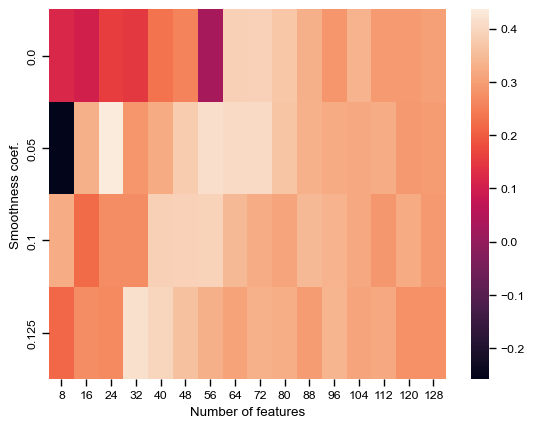

In [ ]:
last_batch_for_r2 = 5
R2_last = np.mean(R_2_over_batches_all_exp_gap[-last_batch_for_r2:,:], 
                  axis = 0)

if NUM_RANDOM_SEEDS > 1:
    R2_last = R2_last.reshape((NUM_RANDOM_SEEDS, NUM_SMOOTH, NUM_FEATURES))
    ax = sns.heatmap(R2_last[0, :, :], 
                xticklabels=num_of_features_array, 
                yticklabels= smoothness_array)
else:
    R2_last = R2_last.reshape((NUM_SMOOTH, NUM_FEATURES))

    ax = sns.heatmap(R2_last, 
                xticklabels=num_of_features_array, 
                yticklabels= smoothness_array)
ax.set_xlabel('Number of features')
ax.set_ylabel('Smoothness coef.')

In [ ]:
# calculate the variance of R_squared
last_batch_for_r2 = 5
R2_std = \
np.std(R_2_over_batches_all_exp_gap_ma[-last_batch_for_r2:,:], axis = 0)


if NUM_RANDOM_SEEDS > 1:
        
    R2_std_smooth_num = R2_std.reshape(NUM_RANDOM_SEEDS,NUM_SMOOTH, NUM_FEATURES)
else:

    R2_std_smooth_num = R2_std.reshape(NUM_SMOOTH, NUM_FEATURES)

Text(52.91666666666667, 0.5, 'Smoothness coef.')

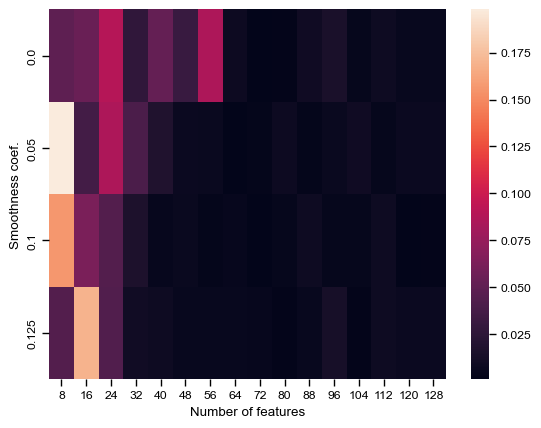

In [ ]:

if NUM_RANDOM_SEEDS > 1:
    ax = sns.heatmap(R2_std_smooth_num[0,: ,: ],
                     xticklabels=num_of_features_array,
                     yticklabels=smoothness_array)

else:
    ax = sns.heatmap(R2_std_smooth_num, 
                xticklabels=num_of_features_array, 
                yticklabels= smoothness_array)
ax.set_xlabel('Number of features')
ax.set_ylabel('Smoothness coef.')

## Count how many rewards

In [51]:
fps = 60

reward_rate_all = list()
window_time_stamps_all = list()
NUM_EXP = len(exp_data_all)

total_rewards_all = list()

for i in range(NUM_EXP):

    time_stamps = exp_data_all[i]['events']['time'] / fps
    events = exp_data_all[i]['events']['event']
    
    num_rewards = np.count_nonzero(events == b'REWARD')

    (reward_rate, window_time_stamps) = aopy.analysis.calc_running_event_rate(b'REWARD', events, time_stamps, 
                                                                window_size= 120,
                                                                 window_step= 30)
    reward_rate_all.append(reward_rate)
    window_time_stamps_all.append(window_time_stamps)
    total_rewards_all.append(num_rewards)


window_stamps_all = np.array(window_time_stamps_all)
reward_rate_all = np.array(reward_rate_all) 
reward_rate_all = reward_rate_all.reshape((NUM_EXP,-1))
window_stamps_all = window_stamps_all.reshape((NUM_EXP,-1))

total_rewards_all = np.array(total_rewards_all)

In [52]:
# add the median reward rate calculation

if NUM_RANDOM_SEEDS > 1:

    print("before reshape", reward_rate_all.shape  )
    # then we need to do reshape and median
    # assume that len(random_seeds) x len(smooth) = total number of exp
    reward_rate_all_reshape = np.reshape(reward_rate_all,
                                             (len(random_seeds), 
                                              len(smoothness_array), 
                                              len(num_of_features_array), -1))
    
    reward_rate_all_reshape  = np.mean(reward_rate_all_reshape[:, :, :, -last_num_batches:], axis = -1)
    
    # # after reshape,  we median along the random and first axiss
    reward_rate_all_median = np.median(reward_rate_all_reshape, axis = 0)

    # print out a message
    # calculate the median across the random seeds, and the 25th, 75th percentiles
    # calculate the error bars based on the error_bar_method
    if error_bar_method == "sem":
        reward_rate_all_sem = np.std(reward_rate_all_reshape, axis = 0) / np.sqrt(len(random_seeds))
        reward_rate_all_25 = reward_rate_all_median - reward_rate_all_sem
        reward_rate_all_75 = reward_rate_all_median + reward_rate_all_sem
        print("used the sem method")
    elif error_bar_method == "percentiles":
        reward_rate_all_25, reward_rate_all_75 = np.percentile(reward_rate_all, [25, 75], axis = 0)
        print("used the percentiles method")

    reward_rate_all = np.median(reward_rate_all_reshape, axis = 0)



print(reward_rate_all.shape)
print(reward_rate_all.shape)
print(reward_rate_all_25.shape, reward_rate_all_75.shape)

before reshape (192, 36)
used the sem method
(4, 16)
(4, 16)
(4, 16) (4, 16)


Text(52.91666666666667, 0.5, 'Smoothness coef.')

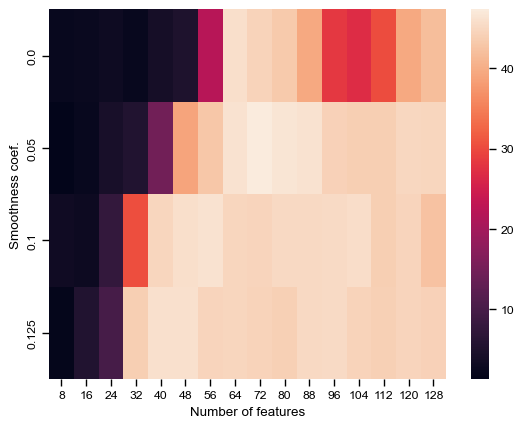

In [53]:
# let's again plot it as a grid
reward_rate_final = reward_rate_all



ax = sns.heatmap(reward_rate_final, 
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array)
ax.set_xlabel('Number of features')
ax.set_ylabel('Smoothness coef.')

Text(0.5, 0, 'Time (min)')

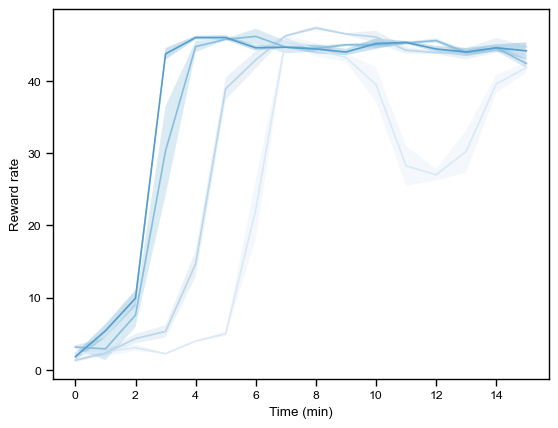

In [55]:
# make a figure that has the error bars

fig_reward_rate, ax_reward_rate = plt.subplots()

for i in range(len(smoothness_array)):
    ax_reward_rate.plot(reward_rate_final[i], label = smoothness_array[i])
    ax_reward_rate.fill_between(np.arange(len(reward_rate_final[i])), 
                                reward_rate_all_25[i], 
                                reward_rate_all_75[i],
                                alpha = 0.3)

ax_reward_rate.set_ylabel('Reward rate')
ax_reward_rate.set_xlabel('Time (min)')

## reward rate vs. rsquared

Text(0, 0.5, 'Reward rate')

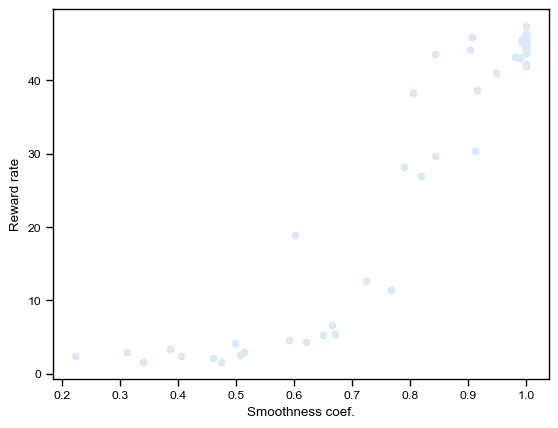

In [34]:
# reward rate 
smoothness_last_flatten = smoothness_last_reshape.flatten()
reward_rate_final_flatten = reward_rate_final.flatten()

fig, ax =  plt.subplots()
ax.scatter(smoothness_last_flatten, reward_rate_final_flatten)
ax.set_xlabel('Smoothness coef.')
ax.set_ylabel('Reward rate')

# Make a summary figure

## SUMMARY PLOT: smoothness, reward rate, Rsquared, dot diagram

Text(0.5, 1.0, 'Reward rate vs. Smoothness')

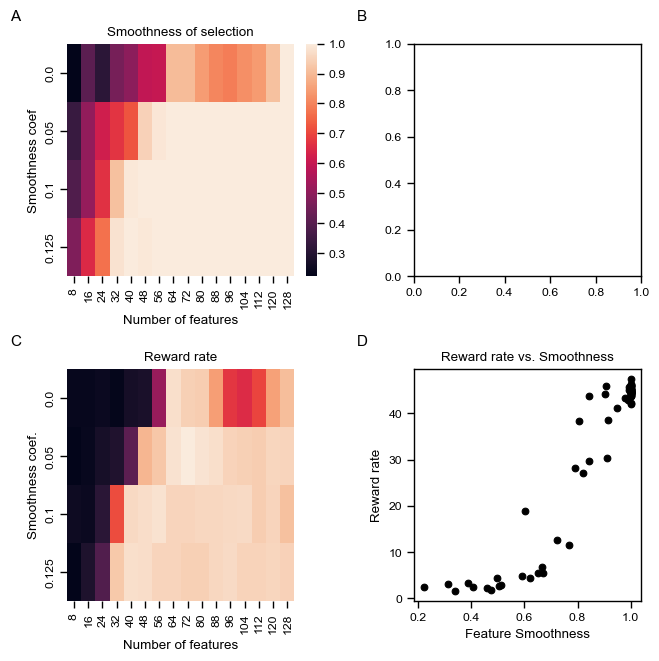

In [36]:
figure4, summary_axes = subplots_with_labels(2,2, 
                        figsize = (6.5, 6.5))

# top left, we plot smoothness
ax = summary_axes[0,0]
sns.heatmap(smoothness_last_reshape,
            ax = ax,
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array)
ax.set_ylabel('Smoothness coef')
ax.set_xlabel('Number of features')
ax.set_title('Smoothness of selection')

# # top right, we plot the number of features
# ax = summary_axes[0,1]
# sns.heatmap(R2_std_smooth_num, 
#             xticklabels=num_of_features_array, 
#             yticklabels= smoothness_array,
#             ax = ax)
# ax.set_xlabel('Number of features')
# ax.set_ylabel('Smoothness coef.')
# ax.set_title('Standard deviation of R squared')

# bottom left, we plot the reward rate
ax = summary_axes[1,0]
sns.heatmap(reward_rate_final, 
            ax = ax,
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array, 
            cbar = False)
ax.set_xlabel('Number of features')
ax.set_ylabel('Smoothness coef.')
ax.set_title('Reward rate')

# bottom right, we plot the relation between smoothness and reward rate
ax = summary_axes[1,1]
ax.scatter(smoothness_last_flatten, reward_rate_final_flatten, color = 'k')
ax.set_xlabel('Feature Smoothness')
ax.set_ylabel('Reward rate')

ax.set_title('Reward rate vs. Smoothness')


# figure4.tight_layout()

## SUMMARY PLOT: smoothness, reward rate and dot diagram

Text(450.4324747972477, 0.5, 'Reward rate')

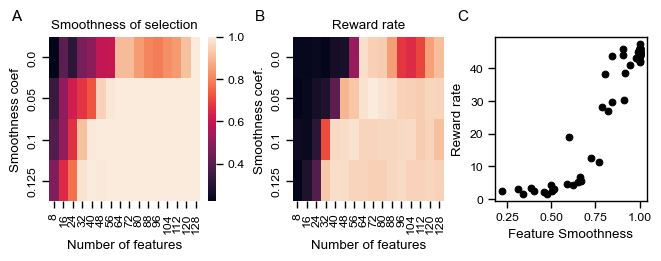

In [37]:
figure4, summary_axes = subplots_with_labels(1,3, 
                        figsize = (6.5, 2.5))

# top left, we plot smoothness
ax = summary_axes[0,0]
sns.heatmap(smoothness_last_reshape,
            ax = ax,
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array)
ax.set_ylabel('Smoothness coef')
ax.set_xlabel('Number of features')
ax.set_title('Smoothness of selection')


# bottom left, we plot the reward rate
ax = summary_axes[0,1]
sns.heatmap(reward_rate_final, 
            ax = ax,
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array, 
            cbar = False)
ax.set_xlabel('Number of features')
ax.set_ylabel('Smoothness coef.')
ax.set_title('Reward rate')

# bottom right, we plot the relation between smoothness and reward rate
ax = summary_axes[0,2]
ax.scatter(smoothness_last_flatten, reward_rate_final_flatten, color = 'k')
ax.set_xlabel('Feature Smoothness')
ax.set_ylabel('Reward rate')


## SUMMARY PLOT: that plot rows of smoothness and reward rate

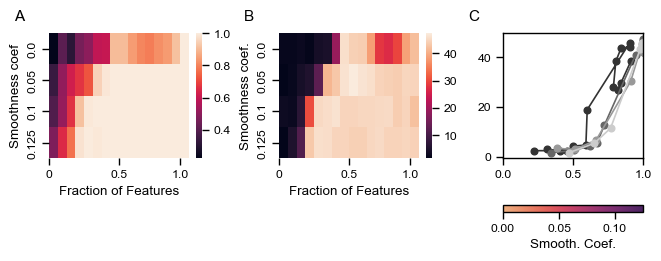

In [38]:
figure4, summary_axes = subplots_with_labels(1,3, 
                        figsize = (6.5, 2.5))

label_decimation_ratios = 8

num_of_features_fractions = np.array(num_of_features_array) / n_neurons

# top left, we plot smoothness
ax = summary_axes[0,0]
sns.heatmap(smoothness_last_reshape,
            ax = ax,
            yticklabels= smoothness_array)
ax.set_xticks([0, len(num_of_features_fractions) // 2, 
               len(num_of_features_fractions) - 1])
ax.set_xticklabels([0, 0.5, 1.0])
ax.set_ylabel('Smoothness coef')
ax.set_xlabel('Fraction of Features')


# bottom left, we plot the reward rate
ax = summary_axes[0,1]
sns.heatmap(reward_rate_final, 
            ax = ax,
            yticklabels= smoothness_array, 
            cbar = True)
ax.set_xticks([0, len(num_of_features_fractions) // 2,
                len(num_of_features_fractions) - 1])
ax.set_xticklabels([0, 0.5, 1.0])
ax.set_xlabel('Fraction of Features')
ax.set_ylabel('Smoothness coef.')

# bottom right, we plot the relation between smoothness and reward rate
# we go down the row and make the plots
colors = sns.color_palette('gray', n_colors=len(smoothness_array))
norm = plt.Normalize(smoothness_array.min(), smoothness_array.max())
sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)
ax = summary_axes[0,2]

for s, r, c in zip(smoothness_last_reshape, reward_rate_final, colors):
    ax.plot(s, r, "o-",color = c)

# limit the x-axis to [0,0.5]a
ax.set_xlim([0,1])

cbar = figure4.colorbar(sm, ax=summary_axes[0,2],
                 orientation='horizontal',
                 location = "bottom")
cbar.set_label('Smooth. Coef.')





/tmp/ipykernel_1112089/758005772.py:51: UserWarning: The figure layout has changed to tight
  figure4.tight_layout()


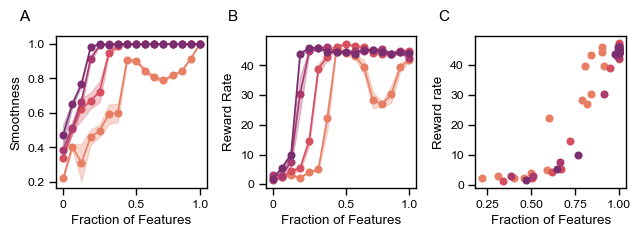

In [56]:
# instead of the heatmaps, we plot the line plots
figure4, summary_axes = subplots_with_labels(1,3, 
                        figsize = (6.5, 2.5))


# top left, we plot smoothness
ax = summary_axes[0,0]
for s,s_25, s_75, c in zip(smoothness_last_reshape, 
                           smoothness_conds_by_batch_25,
                            smoothness_conds_by_batch_75,
                           colors):
    ax.plot( s, "o-", color = c)
    ax.fill_between(np.arange(len(s)),
                    s_25, s_75, color = c, alpha = 0.3)


ax.set_xticks([0, len(num_of_features_fractions) // 2, len(num_of_features_fractions) - 1])
ax.set_xticklabels([0, 0.5, 1.0])
ax.set_ylabel('Smoothness')
ax.set_xlabel('Fraction of Features')


# bottom left, we plot the reward rate
ax = summary_axes[0,1]
for r,r_25, r_75, c in zip(reward_rate_final, 
                            reward_rate_all_25,
                             reward_rate_all_75,
                           colors):
    ax.plot( r, "o-", color = c)
    ax.fill_between(np.arange(len(r)),
                    r_25, r_75, color = c, alpha = 0.3)
    
ax.set_xticks([0, len(num_of_features_fractions) // 2, len(num_of_features_fractions) - 1])
ax.set_xticklabels([0, 0.5, 1.0])
ax.set_xlabel('Fraction of Features')
ax.set_ylabel('Reward Rate')


# bottom right, we plot the relation between smoothness and reward rate
# we go down the row and make the plots
colors = sns.color_palette('flare', n_colors=len(smoothness_array))
norm = plt.Normalize(smoothness_array.min(), smoothness_array.max())
sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)
ax = summary_axes[0,2]

for s, r, c in zip(smoothness_last_reshape, reward_rate_final, colors):
    ax.plot(s, r, "o",color = c)
ax.set_xlabel('Fraction of Features')
ax.set_ylabel('Reward rate')

figure4.tight_layout()

In [ ]:
num_of_features_fractions

array([0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375, 0.5   ,
       0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375, 1.    ])

##  save this as a pickle file, we can then recombine in the next figure

In [58]:
# save variables to a pickle file
# we need to save smoothness array, smoothness_last_reshape, reward_rate_final,
import pickle
if save_to_pickle:
    smooth_and_reward_dict = dict()
    smooth_and_reward_dict['smoothness_array'] = smoothness_array
    smooth_and_reward_dict['smoothness_last_reshape'] = smoothness_last_reshape
    smooth_and_reward_dict['smoothness_conds_by_batch_25'] = smoothness_conds_by_batch_25
    smooth_and_reward_dict['smoothness_conds_by_batch_75'] = smoothness_conds_by_batch_75
    smooth_and_reward_dict['reward_rate_final'] = reward_rate_final
    smooth_and_reward_dict['reward_rate_all_25'] = reward_rate_all_25
    smooth_and_reward_dict['reward_rate_all_75'] = reward_rate_all_75
    with open(data_dump_folder + 'smooth_and_reward_dict.pkl', 'wb') as f:
        pickle.dump(smooth_and_reward_dict, f)


## Save to gdrive

In [ ]:


if save_to_gdrive:
    figure4.savefig(gdrive_directory + 'figure4b_smoothness_num_scan.pdf', dpi = dpi_value)
    figure4.savefig(gdrive_directory + 'figure4b_smoothness_num_scan.png', dpi = dpi_value)